Step 1: Importing the Libraries

In [31]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

Step 2: Reading the Dataset

In [32]:
income = pd.read_csv(r"C:\Users\Poornima Singh\Desktop\Certifications\Python\Income.csv")
income.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Step 3: Study the Clusters in the Dataset

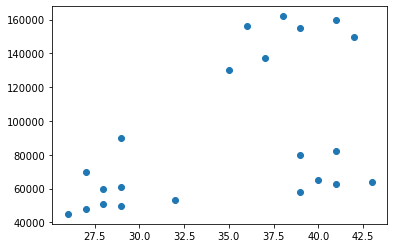

In [33]:
plt.scatter(income['Age'], income['Income($)'])

In [34]:
k=KMeans(n_clusters=3)
k

KMeans(n_clusters=3)

In [35]:
y_predict = k.fit_predict(income[['Age','Income($)']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

Step 4: Appeding y_predict to the original dataset

In [36]:
income['Cluster'] = y_predict
income.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


Step 5: Separating the Clusters into different datasets

In [54]:
k.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'Income($)')

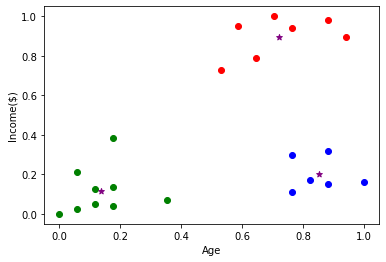

In [56]:
income1 = income[income.Cluster==0]
income2 = income[income.Cluster==1]
income3 = income[income.Cluster==2]

plt.scatter(income1.Age, income1['Income($)'], color='green')
plt.scatter(income2.Age, income2['Income($)'], color='red')
plt.scatter(income3.Age, income3['Income($)'], color='blue')
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')

Step 6: Preprocessing the Dataset to ensure the observations fall under the right cluster

In [43]:
scaler = MinMaxScaler()
scaler.fit(income[['Income($)', 'Age']])
income[['Income($)', 'Age']] = scaler.transform(income[['Income($)','Age']])
income.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


Step 7: Clustering the Scaled Dataset

In [44]:
k=KMeans(n_clusters=3)
y_predict = k.fit_predict(income[['Age','Income($)']])
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [48]:
income['Cluster'] = y_predict
income.drop('cluster', axis=1, inplace=True)
income.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


Step 8: Plotting the Scaled Dataset

Text(0, 0.5, 'Income($)')

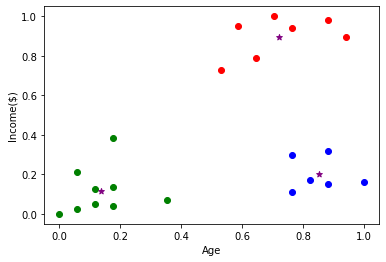

In [57]:
income1 = income[income.Cluster==0]
income2 = income[income.Cluster==1]
income3 = income[income.Cluster==2]

plt.scatter(income1.Age, income1['Income($)'], color='green')
plt.scatter(income2.Age, income2['Income($)'], color='red')
plt.scatter(income3.Age, income3['Income($)'], color='blue')
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')

Only for Reference: Studying the Elbow Plot Technique Using Arrays

In [59]:
k_range = range(1,10)
SSE = []
for km in k_range:
    k = KMeans(n_clusters=km)
    k.fit(income[['Age', 'Income($)']])
    SSE.append(k.inertia_)

C:\Users\Poornima Singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [60]:
#Intertia is used to calculate the SSE values

In [61]:
SSE

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.2664030124668415,
 0.2239580705925012,
 0.17840674931327927,
 0.13781880133764024,
 0.10383752586603559]

In [62]:
#Plotting the SSE values to identify the Elbow curve

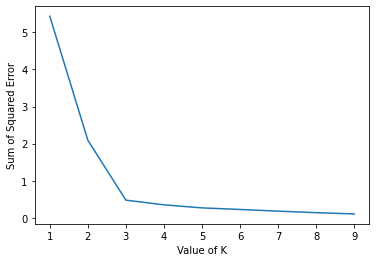

In [63]:
plt.xlabel('Value of K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range,SSE)

In [65]:
#The Elbow point lies at K=3 in the above graph